In [3]:
!pip install flask tensorflow numpy pillow --quiet

In [1]:
import tensorflow as tf
model = tf.keras.models.load_model('tb_classifier_model.keras')
print("Model loaded successfully")

Model loaded successfully


In [2]:
# Install required packages (comment out if already installed)
# !pip install tensorflow numpy pillow matplotlib --quiet

# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Define prediction function
def predict_tb_photo(image_path, model_path='tb_classifier_model.keras'):

    # Check if model file exists
    if not os.path.exists(model_path):
        print(f"Error: Model file not found at {model_path}")
        return
    
    # Load the model
    try:
        model = tf.keras.models.load_model(model_path)
        print("Model loaded successfully")
    except Exception as e:
        print(f"Error loading model: {e}")
        return
    
    # Check if image file exists
    if not os.path.exists(image_path):
        print(f"Error: Image file not found at {image_path}")
        return
    
    # Load and preprocess the image (match training size: 224x224)
    IMG_HEIGHT = 224
    IMG_WIDTH = 224
    try:
        img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
        img_array = img_to_array(img)
        img_array = img_array / 255.0  # Rescale to [0, 1]
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        
        # Make prediction
        prediction = model.predict(img_array)[0][0]  # Get the probability
        class_label = 'Tuberculosis' if prediction > 0.5 else 'Normal'
        confidence = prediction if prediction > 0.5 else 1 - prediction
        
        # Display the image and prediction
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.title(f'Prediction: {class_label}\nConfidence: {confidence:.2%}')
        plt.axis('off')
        plt.show()
        
        print(f'Prediction: {class_label}')
        print(f'Confidence: {confidence:.2%}')
    except Exception as e:
        print(f"Error processing image or making prediction: {e}")

if __name__ == "__main__":
    # Specify the image path
    print("TB Classifier script executed successfully.")

TB Classifier script executed successfully.


Model loaded successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


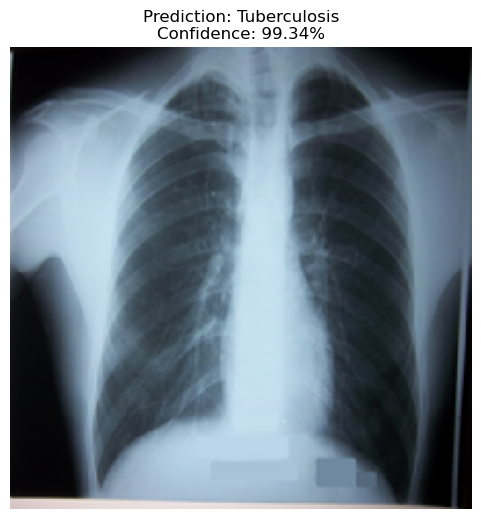

Prediction: Tuberculosis
Confidence: 99.34%


In [3]:
image_path = r"D:\1kpsD9\1Project\MAJOR\majorrr\Tuberculosis\Tuberculosis-308.png"
predict_tb_photo(image_path)

## Tuberculosis Classification Web App

In [4]:
!pip install streamlit --quiet

In [10]:
!npm install -g localtunnel


added 22 packages in 2s

3 packages are looking for funding
  run `npm fund` for details


In [7]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image
import os

# Configuration
MODEL_PATH = 'D:/1kpsD9/1Project/MAJOR/majorrr/tb_classifier_model.keras'
IMG_HEIGHT = 224
IMG_WIDTH = 224

# Memory optimization settings
tf.config.threading.set_inter_op_parallelism_threads(2)
tf.config.threading.set_intra_op_parallelism_threads(2)

# Load the trained model with memory optimization
@st.cache_resource
def load_model():
    if not os.path.exists(MODEL_PATH):
        st.error(f"Model file not found at {MODEL_PATH}")
        return None
    
    try:
        # Reduce memory usage during loading
        with tf.device('/cpu:0'):  # Force CPU loading
            model = tf.keras.models.load_model(
                MODEL_PATH,
                compile=False  # Don't compile during loading
            )
            
            # Recompile with smaller batch size
            model.compile(
                optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy']
            )
            
        # st.success("Model loaded successfully with memory optimization")
        return model
    except Exception as e:
        st.error(f"Error loading model: {e}")
        return None

model = load_model()

def predict_tb_image(img):
    """Predict TB from a PIL image with memory optimization."""
    if model is None:
        st.error("Model not loaded. Cannot make predictions.")
        return None, None
    
    try:
        # Preprocess with minimal memory usage
        img = img.resize((IMG_HEIGHT, IMG_WIDTH))
        img_array = np.array(img, dtype=np.float32) / 255.0  # Use float32 instead of float64
        img_array = np.expand_dims(img_array, axis=0)
        
        # Predict with memory constraints
        with tf.device('/cpu:0'):
            prediction = model.predict(img_array, verbose=0)[0][0]
            
        class_label = 'Tuberculosis' if prediction > 0.5 else 'Normal'
        confidence = max(prediction, 1 - prediction)  # More efficient calculation
        return class_label, round(float(confidence), 4)  # Convert to native Python float
    except Exception as e:
        st.error(f"Error processing image: {str(e)[:200]}")  # Truncate long error messages
        return None, None

# Streamlit UI
st.title("Tuberculosis Classification from Chest X-rays")
# st.markdown("""
#     Upload a chest X-ray image to classify it as Normal or Tuberculosis.\n
#     Note: This is for research purposes only, not for clinical diagnosis.
# """)

uploaded_file = st.file_uploader("Choose an X-ray image...", type=["png", "jpg", "jpeg"])

if uploaded_file is not None:
    try:
        image = Image.open(uploaded_file).convert('RGB')  # Ensure RGB format
        st.image(image, caption="Uploaded Image", use_column_width=True)
        
        with st.spinner("Analyzing X-ray..."):
            class_label, confidence = predict_tb_image(image)
            
            if class_label:
                st.subheader("Diagnosis Result")
                if class_label == 'Tuberculosis':
                    st.error(f"⚠️ Tuberculosis detected (confidence: {confidence:.1%})")
                else:
                    st.success(f"✅ Normal (confidence: {confidence:.1%})")
                
                # Add disclaimer
                st.warning("""
                    **Important:** This AI tool is for research purposes only.\n 
                    Always consult a qualified radiologist for medical diagnosis.
                """)
    except Exception as e:
        st.error(f"Error processing your image: {str(e)[:200]}")

# Add footer
st.markdown("---")
st.caption("TB Detection AI is running...")

Overwriting app.py


In [ ]:
!streamlit run app.py --server.port 8500

In [5]:
# %%writefile app.py

# import streamlit as st
# import tensorflow as tf
# import numpy as np
# from PIL import Image
# import os

# # Configuration
# MODEL_PATH = 'D:/1kpsD9/Project/MAJOR/majorrr/tb_classifier_model.keras'
# IMG_HEIGHT = 224
# IMG_WIDTH = 224

# # Load the trained model
# @st.cache_resource
# def load_model():
#     if not os.path.exists(MODEL_PATH):
#         st.error(f"Model file not found at {MODEL_PATH}")
#         return None
#     try:
#         model = tf.keras.models.load_model(MODEL_PATH)
#         # st.success("Model loaded successfully")
#         return model
#     except Exception as e:
#         st.error(f"Error loading model: {e}")
#         return None

# model = load_model()

# def predict_tb_image(img):
#     """Predict TB from a PIL image."""
#     if model is None:
#         st.error("Model not loaded. Cannot make predictions.")
#         return None, None
    
#     # Preprocess the image
#     try:
#         img = img.resize((IMG_HEIGHT, IMG_WIDTH))
#         img_array = np.array(img) / 255.0  # Rescale to [0, 1]
#         img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        
#         # Make prediction
#         prediction = model.predict(img_array)[0][0]  # Get the probability
#         class_label = 'Tuberculosis' if prediction > 0.5 else 'Normal'
#         confidence = prediction if prediction > 0.5 else 1 - prediction
#         return class_label, confidence
#     except Exception as e:
#         st.error(f"Error processing image or making prediction: {e}")
#         return None, None

# # Streamlit app
# st.title("Tuberculosis Classification Web App")
# st.markdown("Upload an X-ray image to classify it as Normal or Tuberculosis.")

# # File uploader
# uploaded_file = st.file_uploader("Choose an X-ray image...", type=["png", "jpg", "jpeg"])

# if uploaded_file is not None:
#     # Display the uploaded image
#     image = Image.open(uploaded_file)
#     st.image(image, caption="Uploaded Image", use_column_width=True)
    
#     # Predict and display result
#     with st.spinner("Making prediction..."):
#         class_label, confidence = predict_tb_image(image)
#         if class_label and confidence is not None:
#             st.header(f"Prediction: {class_label}")
#             st.info(f"Confidence: {confidence:.2%}")
#         else:
#             st.error("Prediction failed. Please check the error messages above.")

# if __name__ == "__main__":
#     st.write("App is running...")